In [0]:
import pickle 

In [0]:
pickle_off1 = open("drive/My Drive/Colab Notebooks/testX.pickle","rb")
testX= pickle.load(pickle_off1)

pickle_off2 = open("drive/My Drive/Colab Notebooks/trainX.pickle","rb")
trainX= pickle.load(pickle_off2)

pickle_off3 = open("drive/My Drive/Colab Notebooks/trainY.pickle","rb")
trainY= pickle.load(pickle_off3)

In [0]:
#Run this cell to mount your Google Drive.
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
import pandas as pd

In [9]:
trainX.shape

(60000, 28, 28)

# As we can see from the shape, the data is image type and therefore we can confirm this by plotting it .

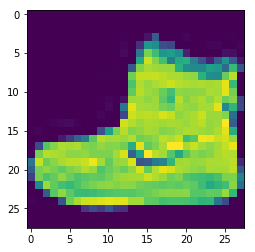

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

plt.imsave('filename.png', np.array(trainX[0]).reshape(28,28), cmap=cm.gray)
plt.imshow(np.array(trainX[0]).reshape(28,28))

In [0]:
# As we can see, the data is image type and therefore we need to use CNN.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(trainX, trainY, test_size=0.2, random_state=42)


In [0]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
testX = testX.reshape(testX.shape[0], *(28, 28, 1))
X_val = X_val.reshape(X_val.shape[0], *(28, 28, 1))

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [0]:
cnn = Sequential() # model has layers in sequence

# convolutional layer
cnn.add(Conv2D(256, (3, 3), input_shape=(28, 28, 1), activation='relu')) # convoluting
cnn.add(MaxPooling2D(pool_size=(3,3))) # pooling

cnn.add(Dropout(0.25)) # to prevent overfitting

cnn.add(Conv2D(64, (3, 3), activation='relu')) # convoluting
cnn.add(MaxPooling2D(pool_size=(2,2))) # pooling

cnn.add(Flatten()) # flattening into 1D set.
# This is input layer of the Neural Network

cnn.add(Dense(units=64, activation='relu')) # first hidden layer with 32 units
# this model has only one hidden layer
cnn.add(Dropout(0.15))
cnn.add(Dense(units=32, activation='relu'))

cnn.add(Dense(units=10, activation='softmax')) # Output layer


In [24]:
cnn.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(X_train, y_train, batch_size=512, epochs=25, verbose=1, validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 5s 106us/step - loss: 2.3029 - acc: 0.5578 - val_loss: 0.6046 - val_acc: 0.7666
Epoch 2/25
48000/48000 [==============================] - 4s 79us/step - loss: 0.6165 - acc: 0.7714 - val_loss: 0.4682 - val_acc: 0.8286
Epoch 3/25
48000/48000 [==============================] - 4s 79us/step - loss: 0.4957 - acc: 0.8209 - val_loss: 0.4086 - val_acc: 0.8472
Epoch 4/25
48000/48000 [==============================] - 4s 79us/step - loss: 0.4379 - acc: 0.8410 - val_loss: 0.3707 - val_acc: 0.8640
Epoch 5/25
48000/48000 [==============================] - 4s 79us/step - loss: 0.3997 - acc: 0.8555 - val_loss: 0.3522 - val_acc: 0.8722
Epoch 6/25
48000/48000 [==============================] - 4s 80us/step - loss: 0.3736 - acc: 0.8644 - val_loss: 0.3424 - val_acc: 0.8748
Epoch 7/25
48000/48000 [==============================] - 4s 80us/step - loss: 0.3546 - acc: 0.8710 - val_loss: 0.3250 - val_ac

In [0]:

y_pred = cnn.predict_classes(testX)

In [0]:
pd.DataFrame(y_pred).to_pickle("drive/My Drive/lastAssignment.pickle")
#y_predto_pickle(y_pred,)

In [30]:
cnn.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 64)          147520    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                36928     
__________

In [0]:
cnn.save("drive/My Drive/myModel.h5")

# I have saved the results in a pickle file and the accuracy on training data is % and on validation data is 90% which can be improved by increasing the hidden layers or changing the number of epochs. As far as deep learn

# New Section